# Target profiles in reduced coordinates

This notebook reproduces the three target-profile plots from `Plot_grafici` using the shared target models.
Plots: $\omega_{\rm pl}$, $|\partial \ln \omega_{\rm pl}^2/\partial h|^{-1}$, and $|B_T|$ vs reduced coordinate.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from modules.planet_env import SUN_ENV, JUPITER_ENV, EARTH_ENV
from modules.conversion import plasma_freq, log_plasma_gradient

plot_factor = 2
font_size = plot_factor * 9
lw_fixed = plot_factor * 1
column_width = plot_factor * 3.375
fig_width = column_width
fig_height = fig_width * 0.75

plt.rcParams.update({
    "text.usetex": True,
    "font.size": font_size,
    "axes.titlesize": font_size,
    "axes.labelsize": font_size,
    "xtick.labelsize": font_size,
    "ytick.labelsize": font_size,
    "legend.fontsize": font_size,
    "figure.titlesize": font_size,
    "font.family": "serif",
    "text.latex.preamble": r"\usepackage{amsmath}"
})


## Reduced coordinates
We use a reduced coordinate $\bar{h} = h/H_{\rm eff}$ with:
- Sun: $H_{\rm eff} = R_\odot$
- Jupiter: $H_{\rm eff} = H_J$ (scale height)
- Earth: $H_{\rm eff} = 2 H_e$ (Chapman profile convention)


In [2]:
# Effective scale heights (km)
H_sun_km = SUN_ENV.radius_km
H_jup_km = JUPITER_ENV.metadata['scale_height_km']
H_earth_km = 2.0 * EARTH_ENV.metadata['H_km']

# Reduced coordinate grid
x_vals = np.logspace(-3, 3, 10_000) # change number of points

# Altitudes (km)
h_sun = x_vals * H_sun_km
h_jup = x_vals * H_jup_km
h_earth = x_vals * H_earth_km

# Plasma frequency (eV)
omega_sun = plasma_freq(SUN_ENV.density_profile(h_sun))
omega_jup = plasma_freq(JUPITER_ENV.density_profile(h_jup))
omega_earth = plasma_freq(EARTH_ENV.density_profile(h_earth))

# Log-gradient of plasma frequency (km^-1) and inverse (km)
Ginv_sun = 1.0 / np.abs(log_plasma_gradient(SUN_ENV, h_sun))
Ginv_jup = 1.0 / np.abs(log_plasma_gradient(JUPITER_ENV, h_jup))
Ginv_earth = 1.0 / np.abs(log_plasma_gradient(EARTH_ENV, h_earth))

# Magnetic field magnitude (Gauss)
B_sun = np.abs(SUN_ENV.magnetic_profile(h_sun))
B_jup = np.abs(JUPITER_ENV.magnetic_profile(h_jup))
B_earth = np.abs(EARTH_ENV.magnetic_profile(h_earth))


## $\omega_{\rm pl}$ vs reduced coordinate


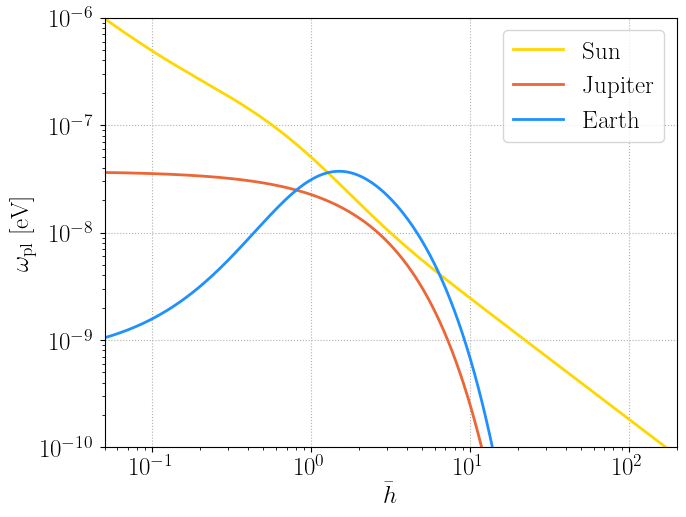

In [3]:
fig, ax = plt.subplots(figsize=(fig_width, fig_height), constrained_layout=True)
ax.loglog(x_vals, omega_sun,   label='Sun',     color='gold', linewidth=lw_fixed)
ax.loglog(x_vals, omega_jup,   label='Jupiter', color='#ed6635', linewidth=lw_fixed)
ax.loglog(x_vals, omega_earth, label='Earth',   color='dodgerblue', linewidth=lw_fixed)

ax.set_xlabel(r'$\bar{h}$')
ax.set_ylabel(r'$\omega_{\rm pl}$ [eV]')
ax.grid(True, which='major', ls=':')
ax.legend()
ax.set_xlim(5e-2, 2e2)
ax.set_ylim(1e-10, 1e-6)

plt.show()


## $|\partial \ln \omega_{\rm pl}^2/\partial h|^{-1}$ vs reduced coordinate


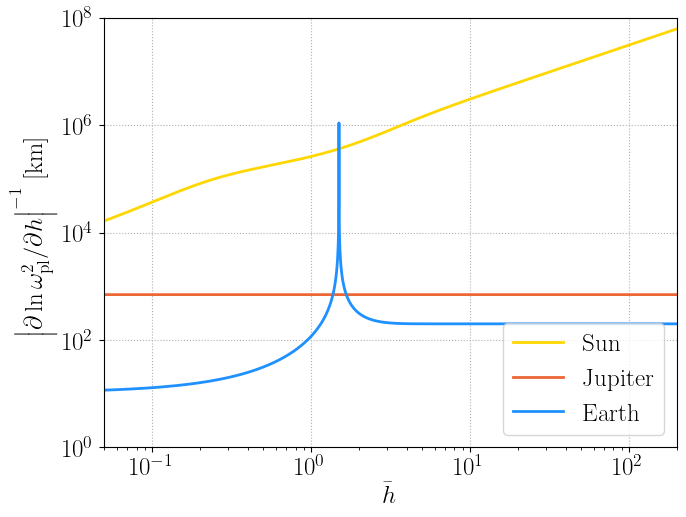

In [4]:
fig, ax = plt.subplots(figsize=(fig_width, fig_height), constrained_layout=True)
ax.loglog(x_vals, Ginv_sun,   label='Sun',     color='gold', linewidth=lw_fixed)
ax.loglog(x_vals, Ginv_jup,   label='Jupiter', color='#ed6635', linewidth=lw_fixed)
ax.loglog(x_vals, Ginv_earth, label='Earth',   color='dodgerblue', linewidth=lw_fixed)

ax.set_xlabel(r'$\bar{h}$')
ax.set_ylabel(r'$\left|\partial \ln \omega_{\rm pl}^2 / \partial h\right|^{-1}$ [km]')
ax.grid(True, which='major', ls=':')
ax.legend(loc='lower right')
ax.set_xlim(5e-2, 2e2)
ax.set_ylim(1e-0, 1e8)

plt.show()


## $|B_T|$ vs reduced coordinate


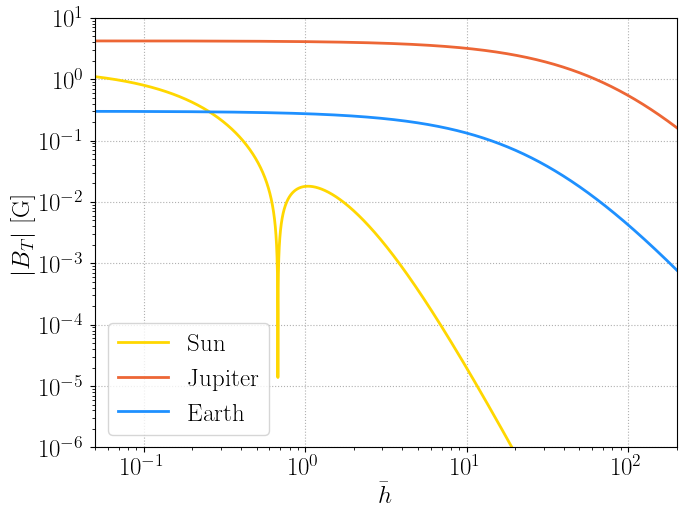

In [5]:
fig, ax = plt.subplots(figsize=(fig_width, fig_height), constrained_layout=True)
ax.loglog(x_vals, B_sun,   label='Sun',     color='gold', linewidth=lw_fixed)
ax.loglog(x_vals, B_jup,   label='Jupiter', color='#ed6635', linewidth=lw_fixed)
ax.loglog(x_vals, B_earth, label='Earth',   color='dodgerblue', linewidth=lw_fixed)

ax.set_xlabel(r'$\bar{h}$')
ax.set_ylabel(r'$|B_T|$ [G]')
ax.grid(True, which='major', ls=':')
ax.legend()
ax.set_xlim(5e-2, 2e2)
ax.set_ylim(1e-6, 1e1)

plt.show()
